# Singer vs Rapper Classification

# Import Library

In [ ]:
# Import library yang dibutuhkan
import os  # Untuk manajemen file dan direktori
import numpy as np  # Untuk operasi numerik
import pandas as pd  # Untuk manipulasi data
import tensorflow as tf  # Untuk membangun dan melatih model deep learning
print(f'TensorFlow version: {tf.__version__}')  # Cek versi TensorFlow

# Library untuk membangun model neural network
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.optimizers import Adam
# Import ModelCheckpoint here
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import BinaryCrossentropy
from sklearn.metrics import classification_report  # Untuk evaluasi model

# Library untuk pemrosesan data dan evaluasi
from sklearn import metrics
from sklearn.model_selection import train_test_split

# Library untuk pemrosesan audio
import librosa
import librosa.display
import soundfile as sf

# Library untuk visualisasi
import seaborn as sns
import matplotlib.pyplot as plt
import IPython.display as ipd  # Untuk menampilkan audio dalam notebook

# Alat bantu tambahan
from itertools import cycle  # Untuk mengatur siklus warna dalam grafik

# Mengatur tema visualisasi seaborn
sns.set_theme(style='white', palette=None)
color_pal = plt.rcParams["axes.prop_cycle"].by_key()['color']
color_cycle = cycle(plt.rcParams["axes.prop_cycle"].by_key()['color'])

TensorFlow version: 2.18.0


# Mengimpor dan Memuat File Audio

 Menghubungkan Google Colab dengan Google Drive

In [ ]:
# Menghubungkan Google Colab dengan Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Mengimpor File Audio dari Google Drive

In [ ]:
import os

# Tentukan path ke folder audio di dalam Google Drive
singer_path = "/content/drive/MyDrive/audio_classification/Artists/Singer"
rapper_path = "/content/drive/MyDrive/audio_classification/Artists/Rapper"

# Mengimpor file audio dari folder Singer
s = []
for root, dirs, files in os.walk(singer_path, topdown=False):
    for name in files:
        if name != '.DS_Store':  # Hindari file sistem yang tidak relevan
            abs_path = os.path.join(root, name)
            s.append(abs_path)

# Mengimpor file audio dari folder Rapper
r = []
for root, dirs, files in os.walk(rapper_path, topdown=False):
    for name in files:
        if name != '.DS_Store':
            abs_path = os.path.join(root, name)
            r.append(abs_path)

s  # Menampilkan daftar file audio di folder Singer

['/content/drive/MyDrive/audio_classification/Artists/Singer/Justin-Bieber-2-Much-(TrendyBeatz.com).mp3',
 '/content/drive/MyDrive/audio_classification/Artists/Singer/Justin-Bieber-All-Around-Me-(TrendyBeatz.com).mp3',
 '/content/drive/MyDrive/audio_classification/Artists/Singer/Justin-Bieber-Afraid-To-Say-(TrendyBeatz.com).mp3',
 '/content/drive/MyDrive/audio_classification/Artists/Singer/Justin-Bieber-Anyone-(TrendyBeatz.com).mp3',
 '/content/drive/MyDrive/audio_classification/Artists/Singer/Justin-Bieber-As-I-Am-Ft-Khalid-(TrendyBeatz.com).mp3',
 '/content/drive/MyDrive/audio_classification/Artists/Singer/Justin-Bieber-Available-(TrendyBeatz.com).mp3',
 '/content/drive/MyDrive/audio_classification/Artists/Singer/Justin-Bieber-Deserve-You-(TrendyBeatz.com).mp3',
 '/content/drive/MyDrive/audio_classification/Artists/Singer/Justin-Bieber-At-Least-For-Now-(TrendyBeatz.com).mp3',
 '/content/drive/MyDrive/audio_classification/Artists/Singer/Justin-Bieber-Ft-Burna-Boy-Loved-By-You-(TrendyB

Visualisasi Gelombang Suara (Waveform)

Singer

In [ ]:
import librosa.display

# Memuat file audio dari daftar Singer
x, sr = librosa.load(s[1])

# Menampilkan bentuk gelombang audio
plt.figure(figsize=(14, 5))
plt.grid()
librosa.display.waveshow(x, sr=sr, color=color_pal[0])
plt.title("Audio Plot - Singer")
plt.ylabel("Amplitude")

# Menampilkan audio player agar bisa didengarkan
display(ipd.Audio(x, rate=sr))


Rapper

In [ ]:
# Memuat file audio dari daftar Rapper
x, sr = librosa.load(r[1])

# Menampilkan bentuk gelombang audio
plt.figure(figsize=(14, 5))
plt.grid()
librosa.display.waveshow(x, sr=sr, color=color_pal[1])
plt.title("Audio Plot - Rapper")
plt.ylabel("Amplitude")

# Menampilkan audio player agar bisa didengarkan
display(ipd.Audio(x, rate=sr))

# Ekstraksi Vokal dari Lagu Menggunakan Spleeter

In [ ]:
### 📌 Fungsi untuk Mengekstrak Vokal dari Banyak File Audio Menggunakan Spleeter
# Fungsi ini menjalankan Spleeter pada setiap file audio dalam daftar (input_list)
# dan menyimpan hasil ekstraksi vokalnya di folder output_dir.

# def extract_vocals(input_list, output_dir):
#     for i in input_list:
#         command = 'spleeter separate ' + i + ' -o ' + output_dir  # Perintah untuk menjalankan Spleeter
#         os.system(command)  # Menjalankan perintah di terminal

# # Membuat folder untuk menyimpan vokal dari file Singer
# output_dir = '/singer-vs-rapper/Vocals/Singer'
# os.makedirs(output_dir, exist_ok=True)
# extract_vocals(s, output_dir)  # Menjalankan ekstraksi vokal untuk Singer

# # Membuat folder untuk menyimpan vokal dari file Rapper
# output_dir = '/singer-vs-rapper/Vocals/Rapper'
# os.makedirs(output_dir, exist_ok=True)
# extract_vocals(r, output_dir)  # Menjalankan ekstraksi vokal untuk Rapper


# Mengimpor Vokal untuk Eksplorasi Data (EDA)

In [ ]:
vocals = []  # Menyimpan path file vokal
target = []  # Menyimpan label (Singer/Rapper)

# Memuat file vokal dari folder Singer
for root, dirs, files in os.walk("/content/drive/MyDrive/audio_classification/Vocals/Singer", topdown=False):
    for name in files:
        if name != '.DS_Store' and name != 'accompaniment.wav':  # Hindari file sistem & instrumen
            abs_path = os.path.join(root, name)
            vocals.append(abs_path)
            target.append('Singer')

# Memuat file vokal dari folder Rapper
for root, dirs, files in os.walk("/content/drive/MyDrive/audio_classification/Vocals/Rapper", topdown=False):
    for name in files:
        if name != '.DS_Store' and name != 'accompaniment.wav':
            abs_path = os.path.join(root, name)
            vocals.append(abs_path)
            target.append('Rapper')

# Membuat DataFrame untuk menyimpan informasi file vokal
df = pd.DataFrame({'Vocals': vocals, 'Target': target})
df  # Menampilkan DataFrame


,Vocals,Target
0,/content/drive/MyDrive/audio_classification/Vo...,Singer
1,/content/drive/MyDrive/audio_classification/Vo...,Singer
2,/content/drive/MyDrive/audio_classification/Vo...,Singer
3,/content/drive/MyDrive/audio_classification/Vo...,Singer
4,/content/drive/MyDrive/audio_classification/Vo...,Singer
5,/content/drive/MyDrive/audio_classification/Vo...,Rapper
6,/content/drive/MyDrive/audio_classification/Vo...,Rapper
7,/content/drive/MyDrive/audio_classification/Vo...,Rapper
8,/content/drive/MyDrive/audio_classification/Vo...,Rapper
9,/content/drive/MyDrive/audio_classification/Vo...,Rapper


visualisasi distribusi data berdasarkan kategori "Target" (Singer atau Rapper)

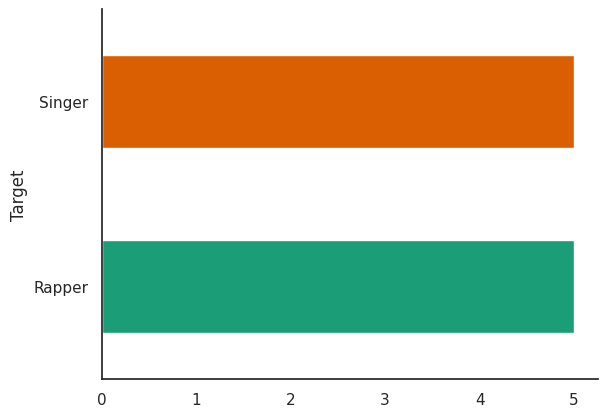

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('Target').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

# Memvisualisasikan Gelombang Suara Vokal

Text(109.74999999999999, 0.5, 'Amplitude')

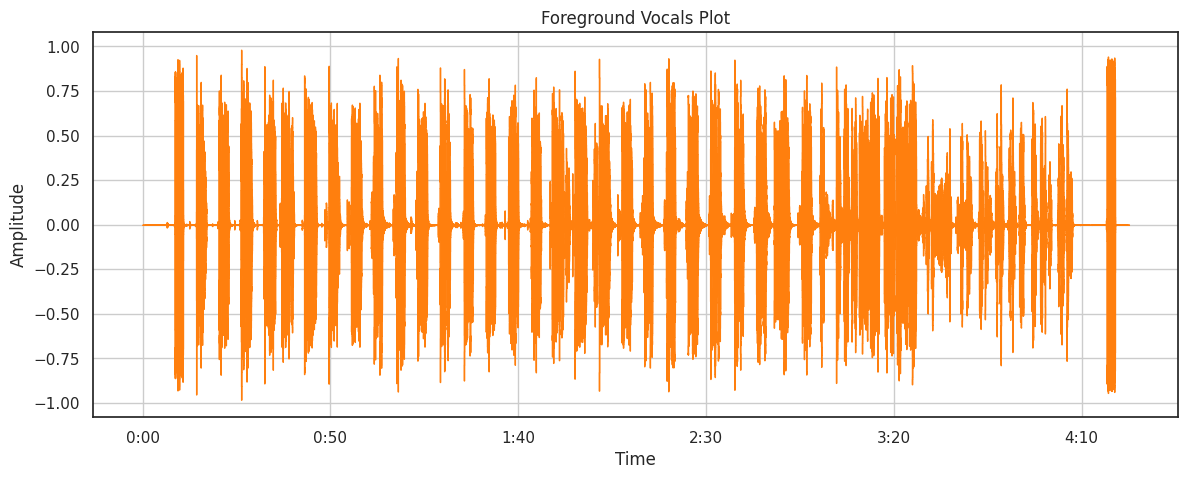

In [ ]:
plt.figure(figsize=(14, 5))  # Atur ukuran plot
plt.grid()  # Tambahkan grid agar lebih mudah dibaca

# Memuat file vokal pertama dalam DataFrame df
x, sr = librosa.load(df.Vocals[0])

# Menampilkan bentuk gelombang suara
librosa.display.waveshow(x, sr=sr, color=color_pal[1])
plt.title("Foreground Vocals Plot")  # Judul plot
plt.ylabel("Amplitude")  # Label sumbu Y

In [ ]:
# Memutar audio
ipd.Audio(x, rate=sr)

# Menghapus bagian audio yang sunyi (silence)

In [ ]:
nonMuteSections = librosa.effects.split(x, top_db=20)
nonMuteSections

array([[ 186368,  238592],
       [ 313856,  356352],
       [ 357888,  372224],
       [ 444928,  505856],
       [ 574464,  643072],
       [ 708608,  762880],
       [ 763392,  781312],
       [ 804864,  806400],
       [ 813568,  835584],
       [ 836096,  862720],
       [ 864256,  868864],
       [ 869376,  883712],
       [ 884736,  887296],
       [ 947712,  990208],
       [ 991232, 1020928],
       [1075200, 1079808],
       [1090560, 1102848],
       [1103360, 1155584],
       [1207296, 1213952],
       [1222656, 1252864],
       [1253376, 1286144],
       [1339904, 1346560],
       [1352192, 1406976],
       [1472000, 1479168],
       [1484288, 1502720],
       [1503744, 1517056],
       [1518080, 1539584],
       [1607680, 1610752],
       [1611264, 1671680],
       [1743360, 1805312],
       [1884672, 1939968],
       [2013696, 2030080],
       [2030592, 2071040],
       [2145792, 2172928],
       [2174464, 2205696],
       [2278912, 2311680],
       [2312192, 2338304],
 

In [ ]:
wav = np.concatenate([x[start:end] for start, end in nonMuteSections])

menampilkan bentuk gelombang (waveform) dari audio

In [ ]:
plt.figure(figsize=(14, 5))  # Membuat figure dengan ukuran 14x5 inci
plt.grid()  # Menambahkan grid untuk memudahkan analisis visual

librosa.display.waveshow(wav, sr=sr, color=color_pal[1])
# Menampilkan bentuk gelombang audio menggunakan warna dari color_pal

plt.title("Foreground Vocals Plot")  # Judul plot
a = plt.ylabel("Amplitude")  # Label sumbu Y menunjukkan amplitudo audio

ipd.Audio(wav, rate=sr)  # Memutar audio setelah pemrosesan


# Ekstraksi Sampel Audio (~6 detik)

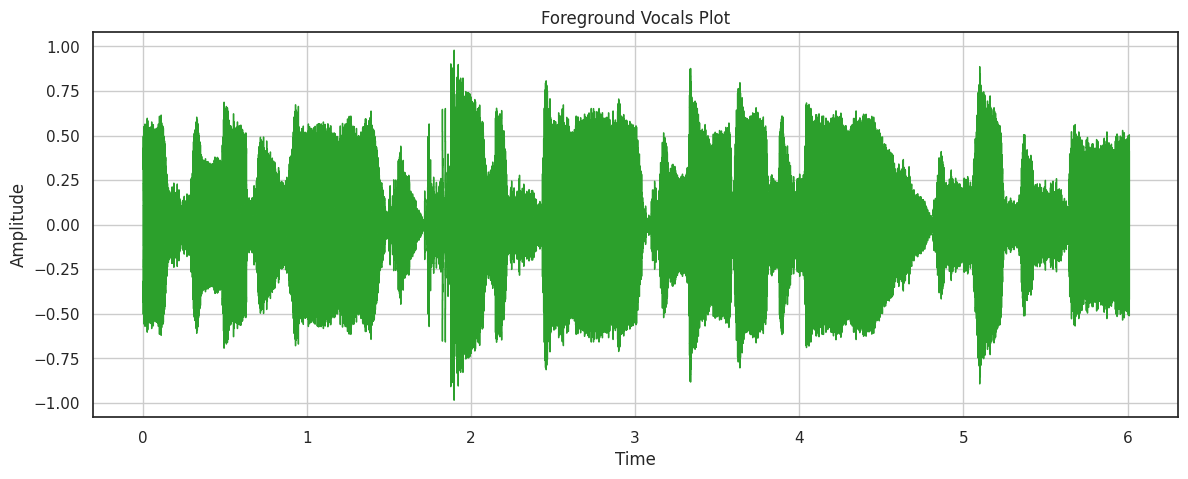

In [ ]:
a = 132500  # Menentukan jumlah sampel untuk sekitar 6 detik
interval_1 = wav[a:a*2]  # Mengambil bagian audio dari posisi a sampai 2*a (sekitar 6 detik)

plt.figure(figsize=(14, 5))  # Membuat figure dengan ukuran 14x5 inci
plt.grid()  # Menampilkan grid

librosa.display.waveshow(interval_1, sr=sr, color=color_pal[2])
# Menampilkan bentuk gelombang (waveform) dari audio yang dipotong

plt.title("Foreground Vocals Plot")  # Menambahkan judul
a = plt.ylabel("Amplitude")  # Menampilkan label sumbu Y

ipd.Audio(interval_1, rate=sr)  # Memutar audio hasil ekstraksi

# Menghapus Silence & Menyimpan Sampel 5 Detik

In [ ]:
dir_path = '/content/drive/MyDrive/audio_classification/Samples'
os.makedirs(dir_path, exist_ok=True)

In [ ]:
# menentukan panjang interval (132500 sampel ≈ 6 detik jika sr=22050 Hz)
interval_length = 132500

# Fungsi untuk menghapus bagian senyap & membagi audio menjadi potongan kecil
def foreground_process(input_list, final_directory, interval_length=132500, number_of_intervals=6):
    count = 1
    os.makedirs(final_directory, exist_ok=True)

    for i in input_list:
        x, sr = librosa.load(i)  # Memuat file audio

        # Menghapus bagian senyap dari audio
        nonMuteSections = librosa.effects.split(x, top_db=20)
        wav = np.concatenate([x[start:end] for start, end in nonMuteSections])

        # Membagi audio menjadi beberapa potongan kecil (5-6 detik per potongan)
        for j in range(number_of_intervals):
            start = (j+1) * interval_length  # Indented this line
            end = (j+2) * interval_length  # Indented this line

            # Cek apakah masih ada cukup audio untuk diambil
            if start < len(wav):  # Indented this line and the following block
                interval = wav[start:end]
                sf.write(f"{final_directory}/{count}.wav", interval, sr, 'PCM_24')
                count += 1

# Menyimpan sampel audio penyanyi
final_directory = '/content/drive/MyDrive/audio_classification/Samples/Singer'
foreground_process(df.Vocals[df.Target == 'Singer'], final_directory)

# Menyimpan sampel audio rapper
final_directory = '/content/drive/MyDrive/audio_classification/Samples/Rapper'
foreground_process(df.Vocals[df.Target == 'Rapper'], final_directory)

# Membuat Dataframe Sampel Audio untuk Klasifikasi

In [ ]:
# Mengumpulkan path file audio dari folder "Samples" dan memberi label

import os
import pandas as pd

vocals = []
target = []

# Loop untuk mengumpulkan file dari folder Singer dan Rapper
for category in ["Singer", "Rapper"]:
    folder_path = f"/content/drive/MyDrive/audio_classification/Samples/{category}"

    for root, dirs, files in os.walk(folder_path, topdown=False):
        for name in files:
            if name not in ['.DS_Store', 'accompaniment.wav']:
                abs_path = os.path.join(root, name)
                vocals.append(abs_path)
                target.append(category)

# Membuat dataframe
df_samples = pd.DataFrame({'Vocals': vocals, 'Target': target})
df_samples


,Vocals,Target
0,/content/drive/MyDrive/audio_classification/Sa...,Singer
1,/content/drive/MyDrive/audio_classification/Sa...,Singer
2,/content/drive/MyDrive/audio_classification/Sa...,Singer
3,/content/drive/MyDrive/audio_classification/Sa...,Singer
4,/content/drive/MyDrive/audio_classification/Sa...,Singer
...,...,...
295,/content/drive/MyDrive/audio_classification/Sa...,Rapper
296,/content/drive/MyDrive/audio_classification/Sa...,Rapper
297,/content/drive/MyDrive/audio_classification/Sa...,Rapper
298,/content/drive/MyDrive/audio_classification/Sa...,Rapper


mengecek keseimbangan data

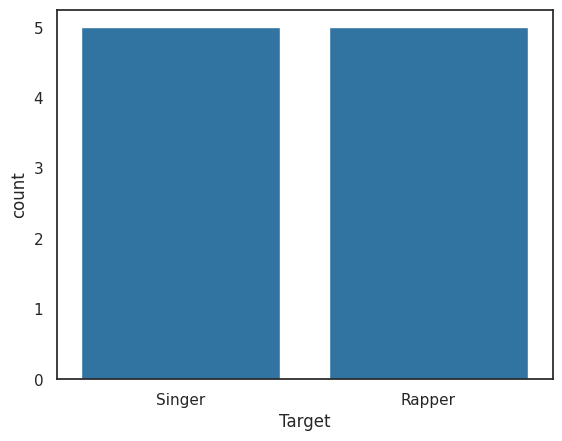

In [ ]:
sns.countplot(data=df, x="Target")  # Menggunakan x untuk orientasi vertikal
plt.show()

#  Mengekstrak fitur MFCC (Mel Frequency Cepstral Coefficients)

In [ ]:
mfcc = librosa.feature.mfcc(y=wav, sr=sr)
mfcc

array([[-418.61523  , -339.92804  , -276.30194  , ..., -281.39957  ,
        -323.67987  , -392.2824   ],
       [  87.8971   ,  151.81143  ,  182.835    , ...,  150.28885  ,
         136.54895  ,   98.83924  ],
       [  56.93334  ,   76.74265  ,   85.129295 , ...,   24.444248 ,
          18.163853 ,   32.42601  ],
       ...,
       [  -5.011809 ,    1.9260026,    6.7809153, ...,   -8.35857  ,
           0.6319104,    7.828662 ],
       [  -5.0314107,   -7.8823357,  -10.044443 , ...,   -6.6296864,
           1.7613649,   11.4788885],
       [  -4.735046 ,   -5.3933115,    3.0787134, ...,   -5.778616 ,
          -1.2796319,    2.3926091]], dtype=float32)

In [ ]:
print(mfcc.shape)

(20, 5608)


In [ ]:
def feature_extractor(file):
    audio, sr = librosa.load(file)  # Membaca file audio
    mfccs_features = librosa.feature.mfcc(y=audio, sr=sr)  # Mengekstrak MFCC
    mfccs_scaled_features = np.mean(mfccs_features.T, axis=0)  # Merata-ratakan MFCC

    return mfccs_scaled_features  # Mengembalikan hasil


In [ ]:
def batch_extractor(input_list):
    extracted_features = []  # Menyimpan hasil ekstraksi fitur
    for i in input_list:  # Looping setiap file audio
        extracted_features.append(feature_extractor(i))  # Ekstrak MFCC dan simpan

    return extracted_features  # Mengembalikan daftar fitur

# Ekstrak fitur dari semua file dalam df_samples
extracted_features = batch_extractor(df_samples.Vocals)

In [ ]:
df_samples['features'] = extracted_features
df_samples

,Vocals,Target,features
0,/content/drive/MyDrive/audio_classification/Sa...,Singer,"[-198.70168, 17.12718, -24.41265, -7.469407, -..."
1,/content/drive/MyDrive/audio_classification/Sa...,Singer,"[-194.16125, 6.9718633, -58.273743, -20.366495..."
2,/content/drive/MyDrive/audio_classification/Sa...,Singer,"[-217.89177, 81.033104, 6.1743183, 8.0990925, ..."
3,/content/drive/MyDrive/audio_classification/Sa...,Singer,"[-191.9196, 75.49394, 16.333113, 0.6360285, 6...."
4,/content/drive/MyDrive/audio_classification/Sa...,Singer,"[-210.73056, 33.33174, 23.650927, 27.09877, -4..."
...,...,...,...
295,/content/drive/MyDrive/audio_classification/Sa...,Rapper,"[-121.47441, 48.19289, -60.16999, 6.8883524, -..."
296,/content/drive/MyDrive/audio_classification/Sa...,Rapper,"[-125.48549, 50.506203, -62.13375, 9.17758, -2..."
297,/content/drive/MyDrive/audio_classification/Sa...,Rapper,"[-113.62676, 35.30431, -28.4804, -5.898463, -7..."
298,/content/drive/MyDrive/audio_classification/Sa...,Rapper,"[-113.03063, 67.61132, -60.720154, 5.833024, -..."


In [ ]:
# Mengacak urutan dataset agar distribusi lebih merata
df_samples = df_samples.sample(frac=1).reset_index(drop=True)
df_samples

,Vocals,Target,features
0,/content/drive/MyDrive/audio_classification/Sa...,Rapper,"[-218.30148, 39.093857, -63.94887, -0.07664201..."
1,/content/drive/MyDrive/audio_classification/Sa...,Singer,"[-156.49002, 4.8944964, -44.60103, -38.801197,..."
2,/content/drive/MyDrive/audio_classification/Sa...,Rapper,"[-155.03249, 9.901245, -51.90144, -3.9098752, ..."
3,/content/drive/MyDrive/audio_classification/Sa...,Rapper,"[-213.0867, 57.321014, -56.393852, -1.3566964,..."
4,/content/drive/MyDrive/audio_classification/Sa...,Rapper,"[-154.8386, -1.1976866, -34.05361, 4.684696, 7..."
...,...,...,...
295,/content/drive/MyDrive/audio_classification/Sa...,Rapper,"[-250.34349, 75.88992, -39.22908, 2.1413507, 8..."
296,/content/drive/MyDrive/audio_classification/Sa...,Singer,"[-175.96384, 29.909176, -8.201378, 11.320619, ..."
297,/content/drive/MyDrive/audio_classification/Sa...,Singer,"[-155.40295, 15.658708, -7.934742, -16.553572,..."
298,/content/drive/MyDrive/audio_classification/Sa...,Rapper,"[-245.24414, 49.52109, -49.243717, -12.705382,..."


In [ ]:
# Menampilkan label unik dalam dataset
print(df_samples['Target'].unique())

['Rapper' 'Singer']


In [ ]:
df_samples['Target'].replace({'Singer': 1, 'Rapper': 0}, inplace=True)

X = np.array(df_samples['features'].tolist())
y = np.array(df_samples['Target'].tolist())
y

<ipython-input-26-69b49027ff14>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_samples['Target'].replace({'Singer': 1, 'Rapper': 0}, inplace=True)
<ipython-input-26-69b49027ff14>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_samples['Target'].replace({'Singer': 1, 'Rapper': 0}, inplace=Tr

array([0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0,
       1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1])

In [ ]:
print(X.shape)
print(y.shape)

(300, 20)
(300,)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.20)
print(X_train.shape)
print(y_train.shape)

(240, 20)
(240,)


# Model Building

In [ ]:
model = Sequential()

#First layer stack
model.add(Dense(100, input_shape=(20,)))
model.add(Activation('relu'))
model.add(Dropout(0.5))


#Second layer stack
model.add(Dense(200))
model.add(Activation('relu'))
model.add(Dropout(0.5))


#Third layer stack
model.add(Dense(200))
model.add(Activation('relu'))
model.add(Dropout(0.5))


#Final Layer
model.add(Dense(1))
model.add(Activation("sigmoid"))

model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 100)                 │           2,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation (Activation)              │ (None, 100)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 100)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 200)                 │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_1 (Activation)            │ (None, 200)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 200)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 200)                 │          40,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_2 (Activation)            │ (None, 200)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 200)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │             201 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_3 (Activation)            │ (None, 1)                   │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 62,701 (244.93 KB)

 Trainable params: 62,701 (244.93 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Save the best model
saved_callbacks = ModelCheckpoint('./content/saved_models/bestmodel.h5',
                                  save_weights_only=False,
                                  monitor='loss',
                                  save_best_only=True)

model.compile(optimizer = Adam(),
             loss = BinaryCrossentropy(),
              metrics = ['accuracy',])

history = model.fit(X_train, y_train, epochs=100, batch_size=32,
                   callbacks=[saved_callbacks]
    )

Epoch 1/100
1/8 ━━━━━━━━━━━━━━━━━━━━ 16s 2s/step - accuracy: 0.6875 - loss: 6.5466

8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.5951 - loss: 8.2985
Epoch 2/100
1/8 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step - accuracy: 0.5000 - loss: 6.3583

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5012 - loss: 8.5514 
Epoch 3/100
1/8 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.7812 - loss: 4.3147

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6125 - loss: 6.7931
Epoch 4/100
1/8 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step - accuracy: 0.5312 - loss: 6.5370

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5774 - loss: 5.9764
Epoch 5/100
1/8 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.5000 - loss: 5.5396

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.5984 - loss: 4.2682
Epoch 6/100
1/8 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - accuracy: 0.7188 - loss: 1.9937

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7044 - loss: 2.7652
Epoch 7/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6725 - loss: 3.0733 
Epoch 8/100
1/8 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.6875 - loss: 1.9177

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6743 - loss: 2.8061
Epoch 9/100
1/8 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.5000 - loss: 2.9797

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6548 - loss: 2.5179
Epoch 10/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6147 - loss: 3.1488 
Epoch 11/100
1/8 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.5625 - loss: 3.2116

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6042 - loss: 2.5355
Epoch 12/100
1/8 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step - accuracy: 0.6562 - loss: 2.0931

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7017 - loss: 1.8852
Epoch 13/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7244 - loss: 1.5902 
Epoch 14/100
1/8 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.6562 - loss: 2.7248

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6929 - loss: 1.9825
Epoch 15/100
1/8 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step - accuracy: 0.5938 - loss: 3.2056

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7001 - loss: 1.7991
Epoch 16/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7132 - loss: 1.7537 
Epoch 17/100
1/8 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.8125 - loss: 0.7170

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7771 - loss: 1.0874
Epoch 18/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7916 - loss: 1.1145 
Epoch 19/100
1/8 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.8438 - loss: 0.9647

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8378 - loss: 0.8717
Epoch 20/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7494 - loss: 1.1932 
Epoch 21/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7884 - loss: 0.8942 
Epoch 22/100
1/8 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.8125 - loss: 0.6309

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8222 - loss: 0.7342
Epoch 23/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8461 - loss: 0.7934 
Epoch 24/100
1/8 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.8125 - loss: 0.9962

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8182 - loss: 0.8692
Epoch 25/100
1/8 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.9688 - loss: 0.0523

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8242 - loss: 0.5655
Epoch 26/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8326 - loss: 0.7218 
Epoch 27/100
1/8 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.8438 - loss: 0.5901

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8403 - loss: 0.6668
Epoch 28/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8245 - loss: 0.6371 
Epoch 29/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8813 - loss: 0.6368 
Epoch 30/100
1/8 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.8438 - loss: 0.4222

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8279 - loss: 0.5205
Epoch 31/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8342 - loss: 0.5807 
Epoch 32/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8164 - loss: 0.7773 
Epoch 33/100
1/8 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.7188 - loss: 0.5427

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8157 - loss: 0.5101
Epoch 34/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8199 - loss: 0.6790 
Epoch 35/100
1/8 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.8438 - loss: 0.7756

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8650 - loss: 0.4963
Epoch 36/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8192 - loss: 0.4876 
Epoch 37/100
1/8 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.8438 - loss: 0.5515

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8750 - loss: 0.4457
Epoch 38/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8632 - loss: 0.4897 
Epoch 39/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8631 - loss: 0.5285 
Epoch 40/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8568 - loss: 0.4330 
Epoch 41/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9069 - loss: 0.2827 
Epoch 42/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8872 - loss: 0.4360 
Epoch 43/100
1/8 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.8438 - loss: 0.4953

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8869 - loss: 0.3143
Epoch 44/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9270 - loss: 0.3763 
Epoch 45/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8786 - loss: 0.3848 
Epoch 46/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9196 - loss: 0.2884 
Epoch 47/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8542 - loss: 0.4450 
Epoch 48/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8668 - loss: 0.3346 
Epoch 49/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8792 - loss: 0.3771 
Epoch 50/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8905 - loss: 0.3226 
Epoch 51/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8794 - loss: 0.2812 
Epoch 52/100
1/8 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step - accuracy: 0.9688 - loss: 0.0741

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9356 - loss: 0.1700
Epoch 53/100
1/8 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - accuracy: 0.9375 - loss: 0.1556

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9315 - loss: 0.1623
Epoch 54/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9414 - loss: 0.2435 
Epoch 55/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9074 - loss: 0.3393 
Epoch 56/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9187 - loss: 0.2543 
Epoch 57/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9062 - loss: 0.2882 
Epoch 58/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9288 - loss: 0.2225 
Epoch 59/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8998 - loss: 0.3210 
Epoch 60/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9283 - loss: 0.2333 
Epoch 61/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9356 - loss: 0.2734 
Epoch 62/100
1/8 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 1.0000 - loss: 0.0299

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9426 - loss: 0.1295
Epoch 63/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9197 - loss: 0.2105 
Epoch 64/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9434 - loss: 0.2354 
Epoch 65/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9187 - loss: 0.2029 
Epoch 66/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9356 - loss: 0.1921 
Epoch 67/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9277 - loss: 0.1555 
Epoch 68/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9142 - loss: 0.3793 
Epoch 69/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9098 - loss: 0.2279 
Epoch 70/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8898 - loss: 0.1938 
Epoch 71/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9269 - loss: 0.2421 
Epoch 72/100
1/8 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step - accuracy: 0.9375 - loss: 0.1668

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.9487 - loss: 0.1255
Epoch 73/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9568 - loss: 0.1863 
Epoch 74/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9300 - loss: 0.2445 
Epoch 75/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9251 - loss: 0.2535
Epoch 76/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9176 - loss: 0.2336 
Epoch 77/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9468 - loss: 0.1676 
Epoch 78/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9184 - loss: 0.2697
Epoch 79/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9552 - loss: 0.1594
Epoch 80/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9555 - loss: 0.1539
Epoch 81/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9120 - loss: 0.2505
Epoch 82/100
1/8 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.8438 - loss: 0.3600

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9314 - loss: 0.1571
Epoch 83/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9599 - loss: 0.0991  
Epoch 84/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9383 - loss: 0.1549 
Epoch 85/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9231 - loss: 0.2257
Epoch 86/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9606 - loss: 0.1307 
Epoch 87/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9398 - loss: 0.1636
Epoch 88/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9624 - loss: 0.1058 
Epoch 89/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9279 - loss: 0.2302
Epoch 90/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9518 - loss: 0.1817 
Epoch 91/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9435 - loss: 0.1513
Epoch 92/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9576 - loss: 0.1153
Epoch 93/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9551 - loss:

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9537 - loss: 0.1305
Epoch 95/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9555 - loss: 0.1195 
Epoch 96/100
1/8 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.9688 - loss: 0.1618

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9777 - loss: 0.1070
Epoch 97/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9623 - loss: 0.1149
Epoch 98/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9678 - loss: 0.1150 
Epoch 99/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9217 - loss: 0.1885 
Epoch 100/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9517 - loss: 0.1075 


# Evaluasi Model

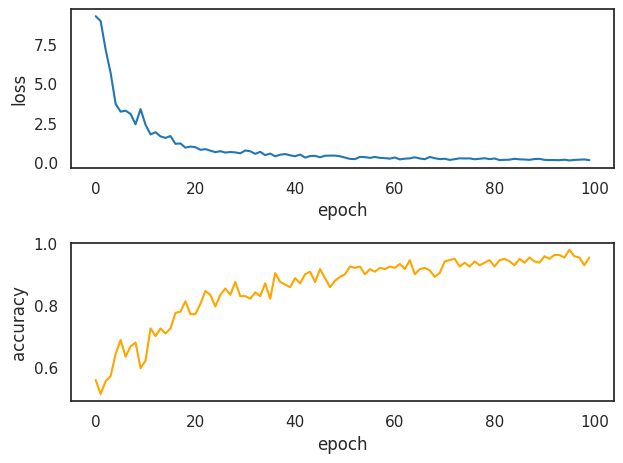

In [ ]:
plt.subplot(2 ,1, 1)
a = plt.plot(history.history['loss'])
plt.ylabel('loss')
plt.xlabel('epoch')


plt.subplot(2, 1 ,2)
b = plt.plot(history.history['accuracy'],color="orange")
plt.ylabel('accuracy')
plt.xlabel('epoch')

plt.tight_layout()
plt.show()

In [ ]:
y_preds = model.predict(X_test)
y_preds = (y_preds>0.5).flatten()
y_preds = y_preds.astype('int')
y_preds

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


array([1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1])

In [ ]:
print(classification_report(y_preds, y_test))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96        27
           1       0.97      0.97      0.97        33

    accuracy                           0.97        60
   macro avg       0.97      0.97      0.97        60
weighted avg       0.97      0.97      0.97        60



In [ ]:
# Fungsi untuk memuat file audio dan mengekstrak fitur MFCC
def load_and_extract_features(file_path):
    if os.path.exists(file_path):
        print("File ditemukan:", file_path)
        audio, sr = librosa.load(file_path, sr=16000)
        mfccs_features = librosa.feature.mfcc(y=audio, sr=sr)
        mfccs_scaled_features = np.mean(mfccs_features.T, axis=0)
        return mfccs_scaled_features
    else:
        print("File tidak ditemukan!")
        return None

# Path ke file audio yang akan diuji
file_path = os.path.abspath("/content/drive/MyDrive/audio_classification/Samples/Rapper/1.wav")

# Memuat dan mengekstrak fitur dari file audio
features = load_and_extract_features(file_path)

if features is not None:
    # Mengubah fitur menjadi array 2D untuk prediksi
    features = np.array([features])

    # Melakukan prediksi menggunakan model yang sudah dilatih
    prediction = model.predict(features)
    prediction = (prediction > 0.5).astype('int')

    # Menampilkan hasil prediksi
    if prediction == 1:
        print("Prediksi: Singer")
    else:
        print("Prediksi: Rapper")

File ditemukan: /content/drive/MyDrive/audio_classification/Samples/Rapper/1.wav
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
Prediksi: Rapper
